# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [102]:
import os, seaborn as sns, pandas as pd, numpy as np
from colorsetup import colors, palette
sns.set_palette(palette)

ModuleNotFoundError: No module named 'colorsetup'

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [7]:
### BEGIN SOLUTION
os.chdir('data')
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [8]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [9]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [10]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [11]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [12]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

In [13]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Examine the breakdown of activities--they are relatively balanced.

In [14]:
data.Activity.value_counts().sum()

10299

In [15]:
data[['Activity']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Activity  10299 non-null  object
dtypes: object(1)
memory usage: 80.6+ KB


In [16]:
data['Activity']

0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

In [17]:
data.Activity

0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

In [18]:
data.shape

(10299, 562)

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

10104    5
4203     2
9103     0
4850     4
839      5
Name: Activity, dtype: int32

In [20]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [21]:
data.Activity

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, Length: 10299, dtype: int32

In [22]:
# # Practice
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# data['Activity'] = le.fit_transform(data.Activity)
# data

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [23]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [24]:
# Practice
# feature_cols = data.columns[:-1]
# corr_vals = data[feature_cols].corr()
# tril_index = np.tril_indices_from(corr_vals)
# for coord in zip(*tril_index):
#     corr_vals.iloc[coord[0], coord[1]] = np.NaN
# corr_vals = corr_vals.stack().to_frame().reset_index().rename(columns={'level_0':'feature1',
#                                 'level_1':'feature2',
#                                 0:'correlation'})
# corr_vals    

A histogram of the absolute value correlations.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# # Practice
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# sns.set_context('talk')
# sns.set_style('white')

# ax = corr_values.abs_correlation.hist(bins=50, figsize=(12,8))
# ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

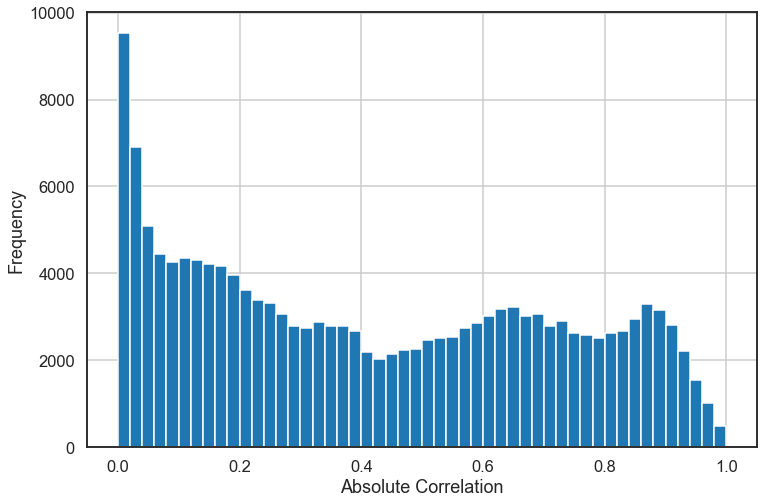

In [27]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [28]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [29]:
# corr_values.sort_values('correlation', ascending=False).query('abs_correlation > 0.8')

## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [30]:
data.Activity

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, Length: 10299, dtype: int32

In [31]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [32]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [33]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [34]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [35]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [36]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [37]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                     l1  \
            0         1         2         3         4         5    0   
439 -0.012041  0.318267  0.026417  0.152830  0.155096 -0.147305  0.0   
501  0.001663  0.238789  0.270591  0.039435  0.152535  0.530902  0.0   
85  -0.031008  0.052927 -0.253070  0.129420  0.227696 -0.451484  0.0   
130 -0.021087 -0.175922  0.302891  0.648495 -0.438042 -0.358331  0.0   
136 -0.009290  0.289894 -0.085512 -0.170516  0.636675  0.210558  0.0   
106 -0.141034  0.320384 -0.184481 -0.166055 -0.652679 -0.029494  0.0   
78   0.125709 -0.057108 -0.000535  0.123448 -0.338952  0.224885  0.0   
408 -0.014922  0.161783  0.159060  0.113912 -0.028943  0.045714  0.0   
15  -0.002510 -0.410494 -0.226061 -0.287421 -0.116039 -0.190292  0.0   
464 -0.001755  0.189918  0.225883  0.068560 -0.223608  0.326644  0.0   

                                                             l2            \
            1         2         3         4         5         0         1   
439  0.860077  0.000000  0.000000  0.000000  0.000000 -0.036192  1.176765   
501  0.365294  0.628191  0.000000  0.054469  0.371642 -0.019043  0.565219   
85   0.000000  0.000000  0.000000  0.030264  0.874893 -0.056870  0.435912   
130  0.000000  0.000000  1.085208 -0.509736 -0.455762 -0.047967 -0.541281   
136  0.716033  0.000000  0.000000  0.872666  0.000000 -0.029070  1.222636   
106  0.178690 -0.360496  0.000000 -2.900716  0.000000 -0.283655  3.215717   
78  -0.145734  0.000000  0.084679 -0.616527  0.504654  0.350567 -0.198939   
408  0.000000  0.006838  0.000000  0.000000  0.000000 -0.045238  0.445790   
15  -0.547576 -0.169632  0.000000  0.000000 -0.658066  0.028123 -0.826767   
464  0.061777  0.030350  0.000000  0.029282  0.341126 -0.023916  0.411645   

                                             
            2         3         4         5  
439 -0.142841  0.488498  0.380818 -0.496773  
501  0.504942  0.063936  0.623906  1.036785  
85  -1.007644  0.268156  0.841526 -0.891777  
130  0.893411  2.075120 -1.845317 -1.014344  
136 -0.664932 -0.148944  2.836676  0.107783  
106 -3.344070 -0.670345 -2.433960  0.018820  
78  -0.044582  0.316075 -0.548357  0.334906  
408  0.474625  0.209187 -0.115166  0.194842  
15  -0.248212 -0.744931 -0.442906 -0.449849  
464  0.229967  0.348586 -0.564037  0.719806

In [38]:
coefficients.shape

(561, 18)

Prepare six separate plots for each of the multi-class coefficients.

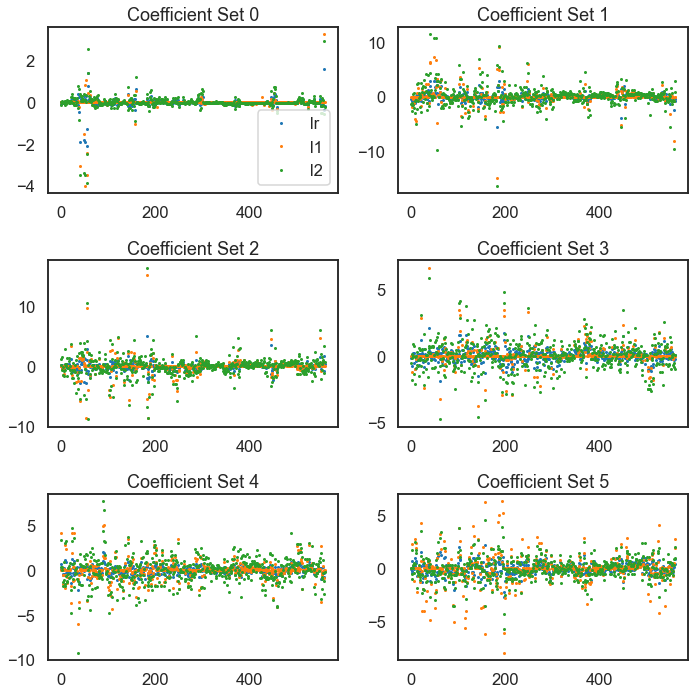

In [39]:
import math

fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 

In [40]:
lr.predict_proba(X_test)[0].sum()

1.0

In [41]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [42]:
# Practice

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [43]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.998939,0.998964,0.999997
1,0.988231,0.999465,0.999999
2,0.987605,0.995157,0.999907
3,0.981381,0.999152,0.999865
4,0.998277,0.999925,0.999997


In [44]:
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
88,2,1,1
197,2,1,1
296,1,2,2
388,1,2,1
430,4,5,5
489,2,1,1
769,4,3,3
853,5,3,3
1036,1,2,1
1071,1,2,2


## Question 7

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [77]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
# metrics

In [78]:
label_binarize(y_test, classes=[0,1,2,3,4,5])

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [73]:
# Practice
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
                        label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
                        average='weighted')
    
    cm[lab] = confusion
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore': fscore,
                             'accuracy':accuracy, 'auc':auc}, name=lab))
    
metrics = pd.concat(metrics, axis=1)
metrics
# coeff_labels

,lr,l1,l2
precision,0.984144,0.983833,0.984800
recall,0.984142,0.983819,0.984790
fscore,0.984143,0.983817,0.984788
accuracy,0.984142,0.983819,0.984790
auc,0.990384,0.990148,0.990741


In [74]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.983833,0.984800
recall,0.984142,0.983819,0.984790
fscore,0.984143,0.983817,0.984788
accuracy,0.984142,0.983819,0.984790
auc,0.990384,0.990148,0.990741


In [90]:
cm['lr']

array([[583,   0,   0,   0,   0,   0],
       [  0, 512,  21,   0,   0,   0],
       [  0,  22, 550,   0,   0,   0],
       [  0,   0,   0, 515,   1,   1],
       [  0,   0,   0,   1, 420,   1],
       [  0,   0,   0,   1,   1, 461]], dtype=int64)

## Question 8

Display or plot the confusion matrix for each model.

NameError: name 'colors' is not defined

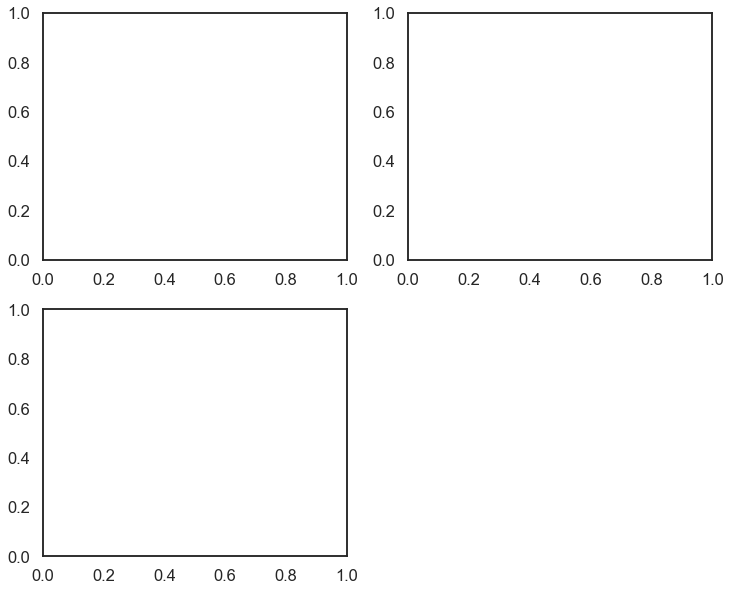

In [96]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

NameError: name 'colors' is not defined

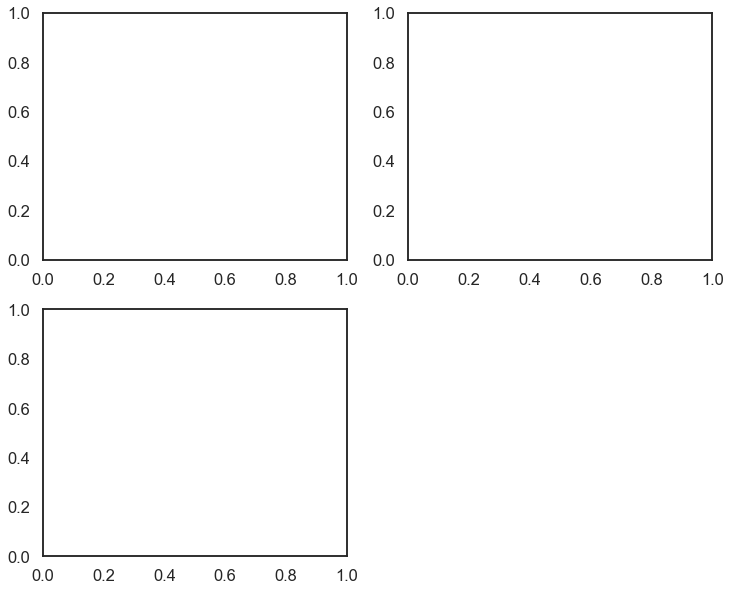

In [98]:
# Practice
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12,10)

axList[-1].axis('off')

for ax, lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()

---
### Machine Learning Foundation (C) 2020 IBM Corporation